In [2]:
import pandas as pd
from transformers import DebertaTokenizer
import matplotlib.pyplot as plt

/Users/nicholasgunawan/.virtualenvs/r-reticulate/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
data = pd.read_json('../../Data/Preprocessed Data/kind:bug/cleaned_data_with_changed_files.json')

In [4]:
# tokenize the all_text using codeBERT tokenizer
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')

for each in ['all_text', 'all_text_0.5', 'all_text_0.6', 'all_text_0.7', 'all_text_0.8', 'all_text_0.9']:
    print(f"\nTokenizing {each}...")
    data[f'{each}_tokenized'] = data[each].apply(lambda x: tokenizer(x)['input_ids'])


Tokenizing all_text...

Tokenizing all_text_0.5...

Tokenizing all_text_0.6...

Tokenizing all_text_0.7...

Tokenizing all_text_0.8...

Tokenizing all_text_0.9...


In [5]:
for each in ['all_text_tokenized', 'all_text_0.5_tokenized', 'all_text_0.6_tokenized', 'all_text_0.7_tokenized', 'all_text_0.8_tokenized', 'all_text_0.9_tokenized']:
    all_text_tokenized_length = data[each].apply(lambda x: len(x))
    print(f"\nSummary statistics for {each}:")
    print(all_text_tokenized_length.describe())


Summary statistics for all_text_tokenized:
count     1258.000000
mean      2613.558029
std       4088.849056
min         84.000000
25%        768.000000
50%       1458.000000
75%       2914.000000
max      49264.000000
Name: all_text_tokenized, dtype: float64

Summary statistics for all_text_0.5_tokenized:
count     1258.000000
mean       666.314785
std        875.517377
min         32.000000
25%        208.000000
50%        404.000000
75%        803.500000
max      12438.000000
Name: all_text_0.5_tokenized, dtype: float64

Summary statistics for all_text_0.6_tokenized:
count     1258.000000
mean       690.499205
std        892.749707
min         33.000000
25%        220.250000
50%        426.500000
75%        832.000000
max      12532.000000
Name: all_text_0.6_tokenized, dtype: float64

Summary statistics for all_text_0.7_tokenized:
count     1258.000000
mean       712.124006
std        904.724292
min         49.000000
25%        237.000000
50%        441.500000
75%        859.750000

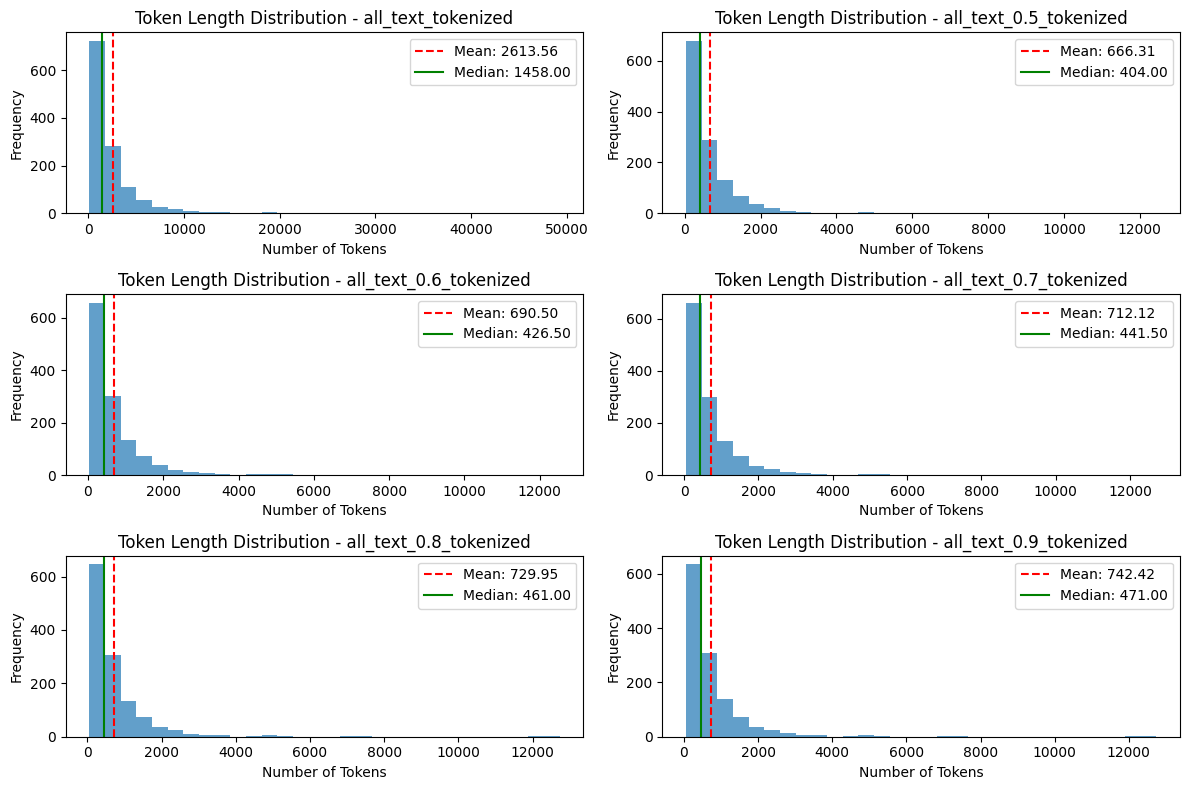

Comparative Statistics:
                               Mean  Median   Min      Max          Std
all_text_tokenized      2613.558029  1458.0  84.0  49264.0  4088.849056
all_text_0.5_tokenized   666.314785   404.0  32.0  12438.0   875.517377
all_text_0.6_tokenized   690.499205   426.5  33.0  12532.0   892.749707
all_text_0.7_tokenized   712.124006   441.5  49.0  12709.0   904.724292
all_text_0.8_tokenized   729.945151   461.0  50.0  12731.0   912.720630
all_text_0.9_tokenized   742.422893   471.0  52.0  12747.0   916.254803


In [6]:
# Create histograms for token lengths
plt.figure(figsize=(12, 8))

token_columns = [col for col in data.columns if col.endswith('_tokenized')]
token_lengths = {}

for i, col in enumerate(token_columns):
    token_lengths[col] = data[col].apply(len)
    plt.subplot(3, 2, i+1)
    plt.hist(token_lengths[col], bins=30, alpha=0.7)
    plt.axvline(x=token_lengths[col].mean(), color='r', linestyle='--', label=f'Mean: {token_lengths[col].mean():.2f}')
    plt.axvline(x=token_lengths[col].median(), color='g', linestyle='-', label=f'Median: {token_lengths[col].median():.2f}')
    plt.title(f'Token Length Distribution - {col}')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Print comparative statistics
print("Comparative Statistics:")
stats_df = pd.DataFrame({
    col: {
        'Mean': token_lengths[col].mean(),
        'Median': token_lengths[col].median(),
        'Min': token_lengths[col].min(),
        'Max': token_lengths[col].max(),
        'Std': token_lengths[col].std()
    } for col in token_columns
})

print(stats_df.T)

In [7]:
# print the token of first 5 rows in all_text_0.5
print("\nToken of first 5 rows in all_text_0.5:")
for i in range(5):
    print(f"Row {i+1}: {data['all_text_0.5_tokenized'][i]}")
    print(f"Tokenized Text: {tokenizer.decode(data['all_text_0.5_tokenized'][i])}")
    print()


Token of first 5 rows in all_text_0.5:
Row 1: [1, 330, 13345, 2716, 2058, 6484, 5849, 36099, 5456, 3116, 356, 5998, 364, 176, 242, 70, 29135, 633, 465, 449, 13345, 2716, 2058, 740, 118, 7425, 7425, 740, 118, 364, 176, 242, 821, 2520, 821, 1755, 32756, 3155, 43260, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 6484, 5849, 36099, 5456, 3116, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 40365, 35543, 1132, 38143, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 321, 45421, 19130, 16925, 37199, 321, 45421, 19130, 417, 398, 102, 33066, 321, 45421, 19130, 417, 2146, 3204, 288, 321, 1178, 1749, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 117, 705, 13470, 9759, 43056, 364, 176, 242, 48076, 333, 1368, 29443, 3

In [8]:
# print number of unique tokens in all_text_0.5
unique_tokens = set()
for tokens in data['all_text_0.5_tokenized']:
    unique_tokens.update(tokens)
print(f"Number of unique tokens in all_text_0.5: {len(unique_tokens)}")

Number of unique tokens in all_text_0.5: 10269
